In [12]:
hyperparameters = {
    'epochs': [200, 400, 600],
    'lr': [0.001, 0.01, 0.1],
    'hidden': [128, 256, 512],
    'weight_decay': [1e-4, 5e-4, 1e-3],
    'dropout': [0.4, 0.6, 0.8],
    'alpha': [1.0, 2.0, 3.0],
    'beta': [1.0, 2.0, 3.0],
    'batch_size': [1024, 2048, 4096],
    'order': [1, 2, 3],
    'tau': [0.5, 1.0, 1.5],
    'k': [10, 15, 20]
}

model without dropout
balance: 0.8103448275862069
entropy: 2.405305485981072
nmi: 1.0
acc: 1.0

model without layer norm
balance: 0.8503937007874016
entropy: 2.061310947823611
nmi: 0.8458033286683967
acc: 0.825

model baseline
balance: 0.7136150234741784
entropy: 2.0217480310141487
nmi: 0.7572925091077589
acc: 0.71

with sigmoid act fn instead of GeLu
balance: 0.8130081300813008
entropy: 2.0610110061369324
nmi: 0.9525717154451236
acc: 0.928

hidden dimension 128:
balance: 0.8103448275862069
entropy: 2.064726162802119
nmi: 0.7933344870509539
acc: 0.763

In [2]:
for hyperparam, values in hyperparameters.items():
    for value in values:
        command = f'python train.py --data cora_balanced --no-cuda --seed 42 --{hyperparam} {value}'
        print(f'Running: {command}')
        !{command}

Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 200
balance: 0.8103448275862069
entropy: 2.0632360401458376
nmi: 0.8222833410346752
acc: 0.771
Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 400
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 600
balance: 0.8103448275862069
entropy: 2.0619968984117616
nmi: 0.8299782152865893
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.001
balance: 0.5517241379310345
entropy: 1.6693895532544134
nmi: 0.7724023177474226
acc: 0.711
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.01
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.1
balance: 0.8658536585365854
entropy: 1.7204669504237833
nmi: 0.7718356893297511


Traceback (most recent call last):
  File "c:\Users\Idries\Desktop\FACT2024\FACT-2024\Fair-Clustering-Codebase\Consensus-Fair-Clustering\train.py", line 92, in <module>
    Y[i,l] = 1.0
    ~^^^^^
IndexError: index 6 is out of bounds for axis 1 with size 6


balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 15
balance: 0
entropy: 1.7202672898066997
nmi: 0.846658887572819
acc: 0.834


In [2]:
command = f'python train.py --data cora_balanced --no-cuda --seed 42 --k 10'
print(f'Running: {command}')
!{command}

Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 10
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773


In [3]:
command = f'python train.py --data cora_balanced --no-cuda --seed 42 --k 15'
print(f'Running: {command}')
!{command}

Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 15
balance: 0
entropy: 1.7202672898066997
nmi: 0.846658887572819
acc: 0.834


In [4]:
command = f'python train.py --data cora_balanced --no-cuda --seed 42 --k 20'
print(f'Running: {command}')
!{command}

Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 20
balance: 0.8215767634854771
entropy: 1.7163603663232783
nmi: 0.7706933469445052
acc: 0.747


In [2]:
for hyperparam, values in hyperparameters.items():
    for value in values:
        command = f'python train.py --data cora_balanced --no-cuda --seed 43 --{hyperparam} {value}'
        print(f'Running: {command}')
        !{command}

Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 200
balance: 0.7729468599033816
entropy: 1.6993039016957516
nmi: 0.8129169385775964
acc: 0.767
Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 400
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 600
balance: 0.26506024096385544
entropy: 2.240130450607018
nmi: 0.7887817290524752
acc: 0.743
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.001
balance: 0.8264462809917356
entropy: 1.374145575076511
nmi: 0.7759478666860784
acc: 0.693
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.01
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.1
balance: 0.6060606060606061
entropy: 3.0564335116387675
nmi: 0.9311091643080242
acc: 0.931
Running: python train.py

In [3]:
for hyperparam, values in hyperparameters.items():
    for value in values:
        command = f'python train.py --data cora_balanced --no-cuda --seed 44 --{hyperparam} {value}'
        print(f'Running: {command}')
        !{command}

Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 200
balance: 0.8034188034188035
entropy: 2.061110218493689
nmi: 0.8252370831744583
acc: 0.772
Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 400
balance: 0.8034188034188035Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 600

entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
balance: 0.8103448275862069
entropy: 2.0618799839033874
nmi: 0.8338974108758488
acc: 0.778
Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.001
balance: 0.8333333333333334
entropy: 1.3764122404221781
nmi: 0.7542171679791688
acc: 0.691
Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.01
balance: 0.8034188034188035Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.1

entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
balance: 0
entropy: 2.7322592046845413
nmi: 0.9309617726516256
acc: 0.931
Running

In [15]:
import re
import statistics

s = """
Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 200
balance: 0.8103448275862069
entropy: 2.0632360401458376
nmi: 0.8222833410346752
acc: 0.771
Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 400
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --epochs 600
balance: 0.8103448275862069
entropy: 2.0619968984117616
nmi: 0.8299782152865893
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.001
balance: 0.5517241379310345
entropy: 1.6693895532544134
nmi: 0.7724023177474226
acc: 0.711
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.01
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --lr 0.1
balance: 0.8658536585365854
entropy: 1.7204669504237833
nmi: 0.7718356893297511
acc: 0.658
Running: python train.py --data cora_balanced --no-cuda --seed 42 --hidden 128
balance: 0.8103448275862069
entropy: 2.061437987111181
nmi: 0.9661735639380462
acc: 0.93
Running: python train.py --data cora_balanced --no-cuda --seed 42 --hidden 256
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --hidden 512
balance: 0.8205128205128205
entropy: 2.0597283949896785
nmi: 0.9470470951954971
acc: 0.924
Running: python train.py --data cora_balanced --no-cuda --seed 42 --weight_decay 0.0001
balance: 0.8103448275862069
entropy: 2.063806684771081
nmi: 0.8299782152865893
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 42 --weight_decay 0.0005
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --weight_decay 0.001
balance: 0.8103448275862069
entropy: 2.0630776253873204
nmi: 0.8357355502207574
acc: 0.778
Running: python train.py --data cora_balanced --no-cuda --seed 42 --dropout 0.4
balance: 0.8103448275862069
entropy: 2.0609363038425066
nmi: 0.9701281251348234
acc: 0.931
Running: python train.py --data cora_balanced --no-cuda --seed 42 --dropout 0.6
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --dropout 0.8
balance: 0.8103448275862069
entropy: 2.063540586803428
nmi: 0.8130967173206495
acc: 0.772
Running: python train.py --data cora_balanced --no-cuda --seed 42 --alpha 1.0
balance: 0.8103448275862069
entropy: 2.063456710179662
nmi: 0.825892922556773
acc: 0.772
Running: python train.py --data cora_balanced --no-cuda --seed 42 --alpha 2.0
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --alpha 3.0
balance: 0.7029702970297029
entropy: 2.0200145991223932
nmi: 0.7501724728840091
acc: 0.712
Running: python train.py --data cora_balanced --no-cuda --seed 42 --beta 1.0
balance: 0.8103448275862069
entropy: 2.058229041278887
nmi: 0.8191353721478135
acc: 0.769
Running: python train.py --data cora_balanced --no-cuda --seed 42 --beta 2.0
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --beta 3.0
balance: 0.8103448275862069
entropy: 2.0632597838849347
nmi: 0.8267602347388023
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --batch_size 1024
balance: 0.8103448275862069
entropy: 2.0620808234139143
nmi: 0.8269462550262701
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --batch_size 2048
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --batch_size 4096
balance: 0.8103448275862069
entropy: 2.0627217119402443
nmi: 0.7993364102388476
acc: 0.715
Running: python train.py --data cora_balanced --no-cuda --seed 42 --order 1
balance: 0.8103448275862069
entropy: 2.0640603703205076
nmi: 0.8247082595908527
acc: 0.771
Running: python train.py --data cora_balanced --no-cuda --seed 42 --order 2
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --order 3
balance: 0.8103448275862069
entropy: 2.062384600040243
nmi: 0.8163532430188369
acc: 0.767
Running: python train.py --data cora_balanced --no-cuda --seed 42 --tau 0.5
balance: 0.8403361344537815
entropy: 2.0653107626325795
nmi: 0.8240350339450613
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 42 --tau 1.0
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --tau 1.5
balance: 0.8103448275862069
entropy: 2.062942230609268
nmi: 0.794226297777871
acc: 0.712
Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 10
balance: 0.8103448275862069
entropy: 2.0623500524715586
nmi: 0.8282685738852996
acc: 0.773
Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 15
balance: 0
entropy: 1.7202672898066997
nmi: 0.846658887572819
acc: 0.834
Running: python train.py --data cora_balanced --no-cuda --seed 42 --k 20
balance: 0.8215767634854771
entropy: 1.7163603663232783
nmi: 0.7706933469445052
acc: 0.747
Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 200
balance: 0.8034188034188035
entropy: 2.061110218493689
nmi: 0.8252370831744583
acc: 0.772
Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 400
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --epochs 600
balance: 0.8103448275862069
entropy: 2.0618799839033874
nmi: 0.8338974108758488
acc: 0.778
Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.001
balance: 0.8333333333333334
entropy: 1.3764122404221781
nmi: 0.7542171679791688
acc: 0.691
Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.01
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --lr 0.1
balance: 0
entropy: 2.7322592046845413
nmi: 0.9309617726516256
acc: 0.931
Running: python train.py --data cora_balanced --no-cuda --seed 44 --hidden 128
balance: 0.8103448275862069
entropy: 2.0620901061498316
nmi: 0.8381141075875371
acc: 0.777
Running: python train.py --data cora_balanced --no-cuda --seed 44 --hidden 256
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --hidden 512
balance: 0.8103448275862069
entropy: 2.0593536490265585
nmi: 0.9535095075803587
acc: 0.926
Running: python train.py --data cora_balanced --no-cuda --seed 44 --weight_decay 0.0001
balance: 0.8103448275862069
entropy: 2.0615789038333334
nmi: 0.8296514228316728
acc: 0.775
Running: python train.py --data cora_balanced --no-cuda --seed 44 --weight_decay 0.0005
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --weight_decay 0.001
balance: 0
entropy: 1.907726483222032
nmi: 0.763264116450703
acc: 0.714
Running: python train.py --data cora_balanced --no-cuda --seed 44 --dropout 0.4
balance: 0.8103448275862069
entropy: 2.406151228692732
nmi: 0.8160357550679451
acc: 0.784
Running: python train.py --data cora_balanced --no-cuda --seed 44 --dropout 0.6
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --dropout 0.8
balance: 0.8658536585365854
entropy: 1.7187743612032313
nmi: 0.8868498784190981
acc: 0.803
Running: python train.py --data cora_balanced --no-cuda --seed 44 --alpha 1.0
balance: 0.8103448275862069
entropy: 2.0612738506477593
nmi: 0.8349005350919924
acc: 0.777
Running: python train.py --data cora_balanced --no-cuda --seed 44 --alpha 2.0
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --alpha 3.0
balance: 0.15584415584415584
entropy: 2.178133382796953
nmi: 0.799896890392211
acc: 0.746
Running: python train.py --data cora_balanced --no-cuda --seed 44 --beta 1.0
balance: 0.8245614035087719
entropy: 2.060487825447387
nmi: 0.8705260179908438
acc: 0.824
Running: python train.py --data cora_balanced --no-cuda --seed 44 --beta 2.0
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --beta 3.0
balance: 0.20512820512820512
entropy: 2.209343210679756
nmi: 0.7858289280184106
acc: 0.745
Running: python train.py --data cora_balanced --no-cuda --seed 44 --batch_size 1024
balance: 0.24691358024691357
entropy: 2.230077302705599
nmi: 0.7931353851480062
acc: 0.747
Running: python train.py --data cora_balanced --no-cuda --seed 44 --batch_size 2048
balance: 0.8034188034188035Running: 
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
python train.py --data cora_balanced --no-cuda --seed 44 --batch_size 4096
balance: 0
entropy: 1.8850512133901185
nmi: 0.7618094943116291
acc: 0.716
Running: python train.py --data cora_balanced --no-cuda --seed 44 --order 1
balance: 0.8103448275862069
entropy: 2.0608393286299735
nmi: 0.8279638603811144
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 44 --order 2
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --order 3
balance: 0.8103448275862069
entropy: 2.061609995964485
nmi: 0.8315775453415195
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --tau 0.5
balance: 0.8103448275862069
entropy: 2.061210532029314
nmi: 0.8278404959197234
acc: 0.775
Running: python train.py --data cora_balanced --no-cuda --seed 44 --tau 1.0
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --tau 1.5
balance: 0.18666666666666668
entropy: 1.8637691015123226
nmi: 0.7766861046087687
acc: 0.707
Running: python train.py --data cora_balanced --no-cuda --seed 44 --k 10
balance: 0.8034188034188035
entropy: 2.0607286947892334
nmi: 0.8291241909481524
acc: 0.776
Running: python train.py --data cora_balanced --no-cuda --seed 44 --k 15
balance: 0.21505376344086022
entropy: 1.8807780980679243
nmi: 0.7934348999013741
acc: 0.79
Running: python train.py --data cora_balanced --no-cuda --seed 44 --k 20
balance: 0.5979381443298969
entropy: 1.6735156528719304
nmi: 0.8554809563744105
acc: 0.808
Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 200
balance: 0.7729468599033816
entropy: 1.6993039016957516
nmi: 0.8129169385775964
acc: 0.767
Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 400
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --epochs 600
balance: 0.26506024096385544
entropy: 2.240130450607018
nmi: 0.7887817290524752
acc: 0.743
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.001
balance: 0.8264462809917356
entropy: 1.374145575076511
nmi: 0.7759478666860784
acc: 0.693
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.01
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --lr 0.1
balance: 0.6060606060606061
entropy: 3.0564335116387675
nmi: 0.9311091643080242
acc: 0.931
Running: python train.py --data cora_balanced --no-cuda --seed 43 --hidden 128
balance: 0.6354166666666666
entropy: 1.6808494658015816
nmi: 0.6917702843207354
acc: 0.612
Running: python train.py --data cora_balanced --no-cuda --seed 43 --hidden 256
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --hidden 512
balance: 0.8205128205128205
entropy: 2.401076541602825
nmi: 0.9685814650838663
acc: 0.989
Running: python train.py --data cora_balanced --no-cuda --seed 43 --weight_decay 0.0001
balance: 0.18421052631578946
entropy: 1.8630235323076016
nmi: 0.7732433271254027
acc: 0.706
Running: python train.py --data cora_balanced --no-cuda --seed 43 --weight_decay 0.0005
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --weight_decay 0.001
balance: 0.8103448275862069
entropy: 2.056661168811027
nmi: 0.946967009463672
acc: 0.925
Running: python train.py --data cora_balanced --no-cuda --seed 43 --dropout 0.4
balance: 0.6185567010309279
entropy: 2.3643687803430113
nmi: 0.7912670775408039
acc: 0.76
Running: python train.py --data cora_balanced --no-cuda --seed 43 --dropout 0.6
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --dropout 0.8
balance: 0.8323699421965318
entropy: 1.7154171244712952
nmi: 0.88621289618414
acc: 0.804
Running: python train.py --data cora_balanced --no-cuda --seed 43 --alpha 1.0
balance: 0.8103448275862069
entropy: 2.063578583004187
nmi: 0.8239890977523473
acc: 0.778
Running: python train.py --data cora_balanced --no-cuda --seed 43 --alpha 2.0
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --alpha 3.0
balance: 0.8103448275862069
entropy: 2.0629502183208626
nmi: 0.8264694143260143
acc: 0.774
Running: python train.py --data cora_balanced --no-cuda --seed 43 --beta 1.0
balance: 0.8103448275862069
entropy: 2.0563177360700946
nmi: 0.950571496942612
acc: 0.925
Running: python train.py --data cora_balanced --no-cuda --seed 43 --beta 2.0
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --beta 3.0
balance: 0.8103448275862069
entropy: 2.057355985247025
nmi: 0.9434260105160183
Running: python train.py --data cora_balanced --no-cuda --seed 43 --batch_size 1024
acc: 0.92
balance: 0.30952380952380953
entropy: 2.262375111056061
nmi: 0.786927154055502
acc: 0.744
Running: python train.py --data cora_balanced --no-cuda --seed 43 --batch_size 2048
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --batch_size 4096
balance: 0.8103448275862069
entropy: 2.0563703185973177
nmi: 0.9539041021776865
acc: 0.926
Running: python train.py --data cora_balanced --no-cuda --seed 43 --order 1
balance: 0.8103448275862069
entropy: 2.055254121873152
nmi: 0.9316597051358012
acc: 0.916
Running: python train.py --data cora_balanced --no-cuda --seed 43 --order 2
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --order 3
balance: 0.8103448275862069
entropy: 2.0563703185973177
nmi: 0.9539041021776865
acc: 0.926
Running: python train.py --data cora_balanced --no-cuda --seed 43 --tau 0.5
balance: 0
entropy: 1.8611341010107427
nmi: 0.7722088614723548
acc: 0.716
Running: python train.py --data cora_balanced --no-cuda --seed 43 --tau 1.0
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --tau 1.5
balance: 0.8034188034188035
entropy: 2.0606691360437233
nmi: 0.8285538664634322
acc: 0.777
Running: python train.py --data cora_balanced --no-cuda --seed 43 --k 10
balance: 0
entropy: 1.9237657126504502
nmi: 0.7654416395144711
acc: 0.708
Running: python train.py --data cora_balanced --no-cuda --seed 43 --k 15
balance: 0.8245614035087719
entropy: 2.065454570307123
nmi: 0.7135831646678434
acc: 0.668
Running: python train.py --data cora_balanced --no-cuda --seed 43 --k 20
balance: 0.3893805309734513
entropy: 1.9635250187397262
nmi: 0.6817225641539526
acc: 0.679
"""

# Extract the numbers
results = {}
matches = re.findall(r'--data \w+ --no-cuda --seed (\d+) --(\w+) (\d+\.?\d*)\n((?:\w+: \d+\.?\d*\n)*)', s)
for match in matches:
    seed, hyperparam, value, metrics = match
    key = f'{hyperparam}_{value}_seed_{seed}'
    results[key] = {}
    metric_matches = re.findall(r'(\w+): (\d+\.?\d*)', metrics)
    for metric_match in metric_matches:
        metric, metric_value = metric_match
        results[key][metric] = float(metric_value)

# Group results by hyperparameters and calculate mean and std for each metric
grouped_results = {}
for key in results:
    hyperparam = '_'.join(key.split('_')[:-2])
    if hyperparam not in grouped_results:
        grouped_results[hyperparam] = {}
    for metric in results[key]:
        if metric not in grouped_results[hyperparam]:
            grouped_results[hyperparam][metric] = []
        grouped_results[hyperparam][metric].append(results[key][metric])

for hyperparam in grouped_results:
    for metric in grouped_results[hyperparam]:
        mean = statistics.mean(grouped_results[hyperparam][metric])
        std = statistics.stdev(grouped_results[hyperparam][metric])
        print(f'{hyperparam} {metric} mean: {mean}, std: {std}')
        
# for hyperparam in results:
#     print(f'{hyperparam}: {results[hyperparam]}')

epochs_200 balance mean: 0.7955701636361306, std: 0.019896051279840066
epochs_200 entropy mean: 1.9412167201117594, std: 0.20950534256888645
epochs_200 nmi mean: 0.8201457875955767, std: 0.006432211264460147
epochs_200 acc mean: 0.77, std: 0.002645751311064593
epochs_400 balance mean: 0.5379212103350034, std: 0.46586630469363
epochs_400 entropy mean: 2.015614819970414, std: 0.07954779121251067
epochs_400 nmi mean: 0.8076114681159744, std: 0.03652264849856434
epochs_400 acc mean: 0.7523333333333333, std: 0.0384230833397495
epochs_600 balance mean: 0.6285832987120897, std: 0.3148202028713684
epochs_600 entropy mean: 2.1213357776407222, std: 0.10287922123114769
epochs_600 nmi mean: 0.8175524517383045, std: 0.024993116780733522
epochs_600 acc mean: 0.765, std: 0.019157244060668033
lr_0.001 balance mean: 0.7371679174187011, std: 0.16063593740347062
lr_0.001 entropy mean: 1.4733157895843676, std: 0.16980864242655633
lr_0.001 nmi mean: 0.7675224508042233, std: 0.011658286435412269
lr_0.001 ac

In [21]:
grouped_results

{'epochs_200': {'balance': [0.8103448275862069,
   0.8034188034188035,
   0.7729468599033816],
  'entropy': [2.0632360401458376, 2.061110218493689, 1.6993039016957516],
  'nmi': [0.8222833410346752, 0.8252370831744583, 0.8129169385775964],
  'acc': [0.771, 0.772, 0.767]},
 'epochs_400': {'balance': [0.8103448275862069, 0.8034188034188035, 0.0],
  'entropy': [2.0623500524715586, 2.0607286947892334, 1.9237657126504502],
  'nmi': [0.8282685738852996, 0.8291241909481524, 0.7654416395144711],
  'acc': [0.773, 0.776, 0.708]},
 'epochs_600': {'balance': [0.8103448275862069,
   0.8103448275862069,
   0.26506024096385544],
  'entropy': [2.0619968984117616, 2.0618799839033874, 2.240130450607018],
  'nmi': [0.8299782152865893, 0.8338974108758488, 0.7887817290524752],
  'acc': [0.774, 0.778, 0.743]},
 'lr_0.001': {'balance': [0.5517241379310345,
   0.8333333333333334,
   0.8264462809917356],
  'entropy': [1.6693895532544134, 1.3764122404221781, 1.374145575076511],
  'nmi': [0.7724023177474226, 0.7

In [44]:
flattened_keys = {}
for key, values in hyperparameters.items():
    new_key = f"{key}[{','.join(map(str, values))}]"
    flattened_keys[key] = new_key

print(flattened_keys)

{'epochs': 'epochs[200,400,600]', 'lr': 'lr[0.001,0.01,0.1]', 'hidden': 'hidden[128,256,512]', 'weight_decay': 'weight_decay[0.0001,0.0005,0.001]', 'dropout': 'dropout[0.4,0.6,0.8]', 'alpha': 'alpha[1.0,2.0,3.0]', 'beta': 'beta[1.0,2.0,3.0]', 'batch_size': 'batch_size[1024,2048,4096]', 'order': 'order[1,2,3]', 'tau': 'tau[0.5,1.0,1.5]', 'k': 'k[10,15,20]'}


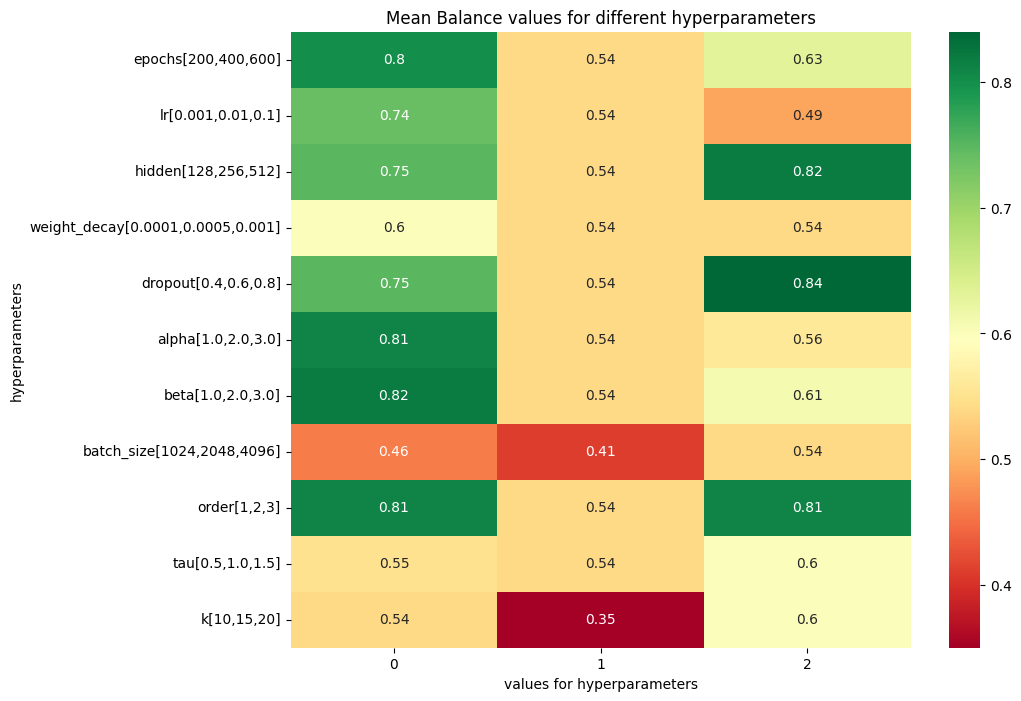

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = {}
for key in grouped_results:
    if 'weight_decay' in key:
        _, _, value = key.split('_')
        hyperparam = 'weight_decay'
    elif 'batch_size' in key:
        _, _, value = key.split('_')
        hyperparam = 'batch_size'
    else:
        hyperparam, value = key.split('_')
    if flattened_keys[hyperparam] not in data:
        data[flattened_keys[hyperparam]] = []
    mean_balance = round(sum(grouped_results[key]['balance']) / len(grouped_results[key]['balance']), 2)
    data[flattened_keys[hyperparam]].append(mean_balance)

df = pd.DataFrame(data)
df = df.transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='RdYlGn')
plt.title('Mean Balance values for different hyperparameters')
plt.xlabel('values for hyperparameters')
plt.ylabel('hyperparameters')
plt.show()